In [1]:
import os
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import sklearn as sk
import os
import time
import datetime
import math

In [2]:
path = '/home/catherinej/Downloads'
file = os.path.join(path, 'IrmaMudThicknessComparisons - Original Data.csv')
mud = pd.read_csv(file)
# mud.head()
# mud.info()
# mud.describe()
mud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
Region                      127 non-null object
Site                        127 non-null object
Station                     127 non-null object
Date 1                      118 non-null object
Date 2                      107 non-null object
Thickness at Date 1 (cm)    117 non-null object
Thickness at Date 2 (cm)    92 non-null float64
Thickness at Date 3 (cm)    120 non-null object
Lat                         101 non-null float64
Lon                         101 non-null float64
water_lat                   101 non-null float64
water_lon                   101 non-null float64
Notes                       14 non-null object
Unnamed: 13                 1 non-null object
dtypes: float64(5), object(9)
memory usage: 14.3+ KB


In [3]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return (km * 1000)

In [4]:
site_lat = mud['Lat']
site_lon = mud['Lon']
ocean_lat = mud['water_lat']
ocean_lon = mud['water_lon']

In [5]:
distance = []
for i in range(len(site_lat)):
    dist = haversine(site_lon[i], site_lat[i], ocean_lon[i], ocean_lat[i])
    distance.append(dist)
dist = pd.DataFrame({'Distance': distance})
# mud = mud.join(dist) 


In [61]:
# mud = mud.join(dist)
mud.info()
mud['Site'][12]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
Region                      127 non-null object
Site                        127 non-null object
Station                     127 non-null object
Date 1                      118 non-null object
Date 2                      107 non-null object
Thickness at Date 1 (cm)    117 non-null object
Thickness at Date 2 (cm)    92 non-null float64
Thickness at Date 3 (cm)    120 non-null object
Lat                         101 non-null float64
Lon                         101 non-null float64
water_lat                   101 non-null float64
water_lon                   101 non-null float64
Notes                       14 non-null object
Unnamed: 13                 1 non-null object
Distance                    101 non-null float64
dtypes: float64(6), object(9)
memory usage: 15.3+ KB


AttributeError: 'str' object has no attribute 'dtype'

In [52]:
from mud_machine_learning import clean_dataframe as cdf
from mud_machine_learning import categorize_text
mud1 = mud
train, test = cdf(mud, mud1)
train.info()
train['Thickness at Date 1 (cm)'] = train['Thickness at Date 1 (cm)'].apply(pd.to_numeric)
train['Thickness at Date 3 (cm)'] = train['Thickness at Date 3 (cm)'].apply(pd.to_numeric)
train_cat, test_cat = categorize_text(train, test)

for key in train_cat:
    if key.startswith('Site'):
        print(key)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 126
Data columns (total 12 columns):
Region                      81 non-null object
Site                        81 non-null object
Station                     81 non-null object
Thickness at Date 1 (cm)    81 non-null object
Thickness at Date 2 (cm)    81 non-null float64
Thickness at Date 3 (cm)    81 non-null object
Lat                         81 non-null float64
Lon                         81 non-null float64
water_lat                   81 non-null float64
water_lon                   81 non-null float64
Unnamed: 13                 1 non-null object
Distance                    81 non-null float64
dtypes: float64(6), object(6)
memory usage: 8.2+ KB
Site_BW3
Site_CBD
Site_CCB
Site_SNK
Site_UFU
Site_WTZ


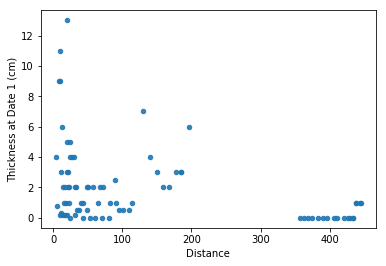

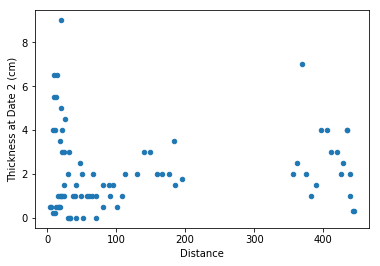

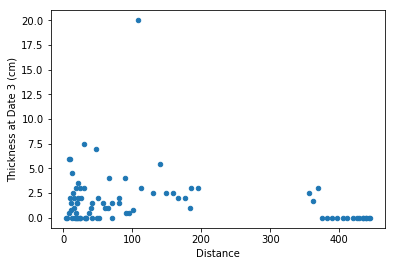

In [11]:
train.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', alpha=1)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 3 (cm)', alpha=1)
# plt.legend()

In [69]:
for site in train['Site']:
    print(site)
    s = [train.Site == site]
    print(s)
#     s = train.loc[train['Site'] == site]
    s.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
    plt.title(site)
    plt.savefig('{}_Date1vDist.png'.format(site))
    
# for site in train['Site']:
#     s = train.loc[train['Site'] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 2 (cm)", alpha=0.9,)
#     plt.title(site)
#     plt.savefig('{}_Date2vDist.png'.format(site))

        
# for site in train['Site']:
#     s = train.loc[train['Site'] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 3 (cm)", alpha=0.9,)
#     plt.title(site)
#     plt.savefig('{}_Date3vDist.png'.format(site))

CCB
[0       True
4       True
8       True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
34     False
35     False
36     False
37     False
38     False
39     False
       ...  
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
Name: Site, Length: 81, dtype: bool]


AttributeError: 'list' object has no attribute 'plot'

['Site_BW3', 'Site_CBD', 'Site_CCB', 'Site_SNK', 'Site_UFU', 'Site_WTZ']


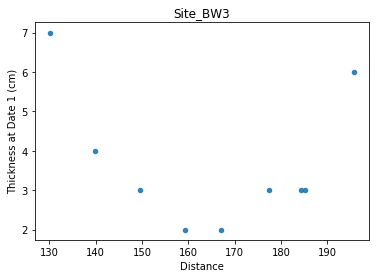

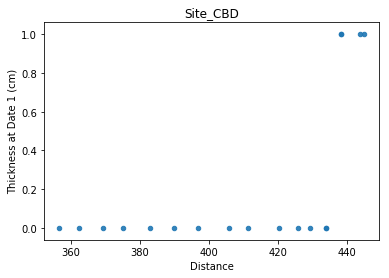

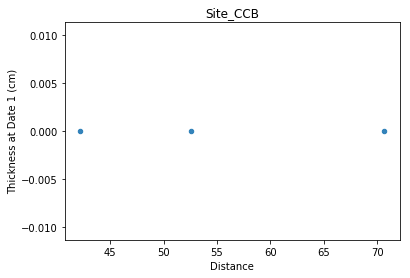

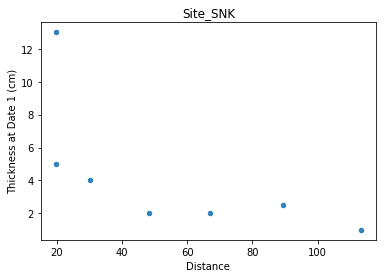

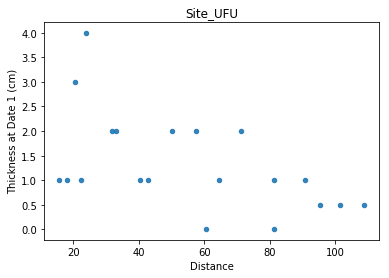

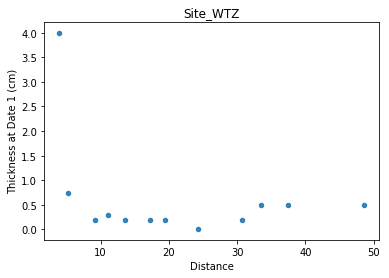

In [49]:
site_names = []
for column in train_cat:
    if column.startswith('Site_'):
        site_names.append(column)
print(site_names)


for site in site_names:
    s = site[-3:]
    t = train_cat.loc[train['Site'] == s]
    t.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
    plt.title(site)
# train_cat.loc[site_names"]
# print(s)
# for site in site_names:
#     s = train_cat.loc[train_cat[site] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
#     plt.title(site)
#     #plt.savefig('{}_Date1vDist.png'.format(site))

In [14]:
for index, name in enumerate(mud):
    print(index, name)
#     if name.startswith('S'):
#         print(name)

0 Region
1 Site
2 Station
3 Date 1
4 Date 2
5 Thickness at Date 1 (cm)
6 Thickness at Date 2 (cm)
7 Thickness at Date 3 (cm)
8 Lat
9 Lon
10 water_lat
11 water_lon
12 Notes
13 Unnamed: 13
14 Distance
